## Visualisation de données : application à une base de données de chiffres manuscrits

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.datasets import load_digits

print("Bibliothèques importées avec succès.")

Bibliothèques importées avec succès.


### Chargement des digits de chiffres manuscrits depuis sklearn

In [17]:
digits = load_digits()
print("Données chargées avec succès.")

Données chargées avec succès.


Nombre d'échantillons : 1797
Dimensions des images : (8, 8)
Nombre total de pixels par image (8x8): 64
Nombre de classes : 10
Dimensions de X : (1797, 64)
Dimensions de Y : (1797,)
Aperçu des données (X) :
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]
Aperçu des étiquettes (Y) :
[0 1 2 ... 8 9 8]


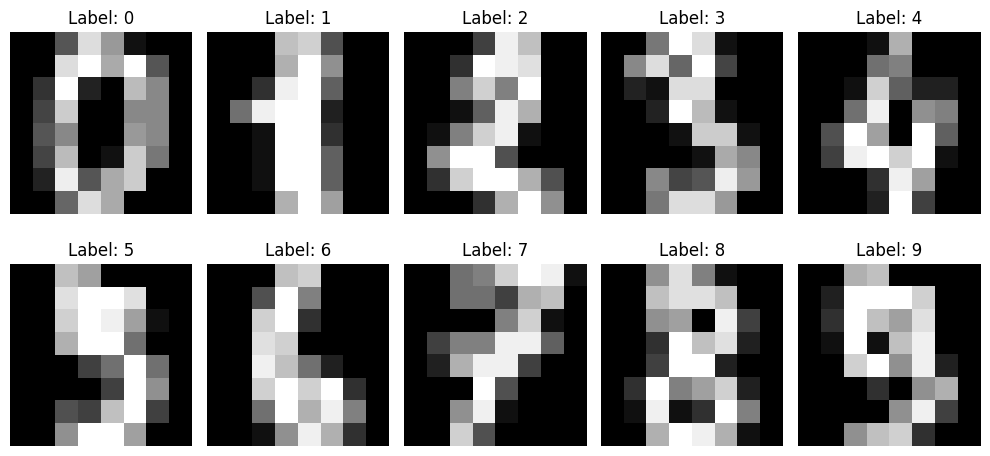

In [18]:
# Compréhension des données
print(f"Nombre d'échantillons : {len(digits.data)}")
print(f"Dimensions des images : {digits.images[0].shape}")
print(f"Nombre total de pixels par image (8x8): {digits.data.shape[1]}")

print(f"Nombre de classes : {len(np.unique(digits.target))}")

X = digits.data
Y = digits.target

print(f"Dimensions de X : {X.shape}")
print(f"Dimensions de Y : {Y.shape}")

print("Aperçu des données (X) :")
print(X[:1])
print("Aperçu des étiquettes (Y) :")
print(Y)

# Visualisation de quelques exemples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), digits.images, digits.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.tight_layout()
plt.show()



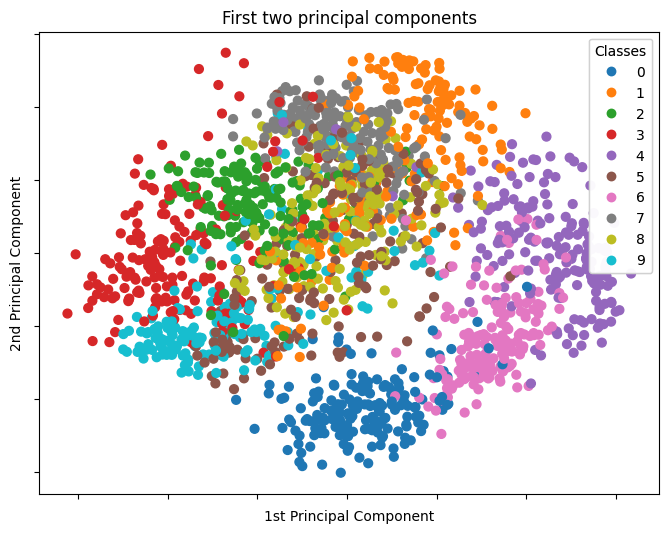

In [19]:
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

X_reduced = PCA(n_components=2).fit_transform(digits.data)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=digits.target,
    s=40,
    cmap='tab10'
)

ax.set(
    title="First two principal components",
    xlabel="1st Principal Component",
    ylabel="2nd Principal Component",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    digits.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

### Analyse de la variance expliquée par la PCA

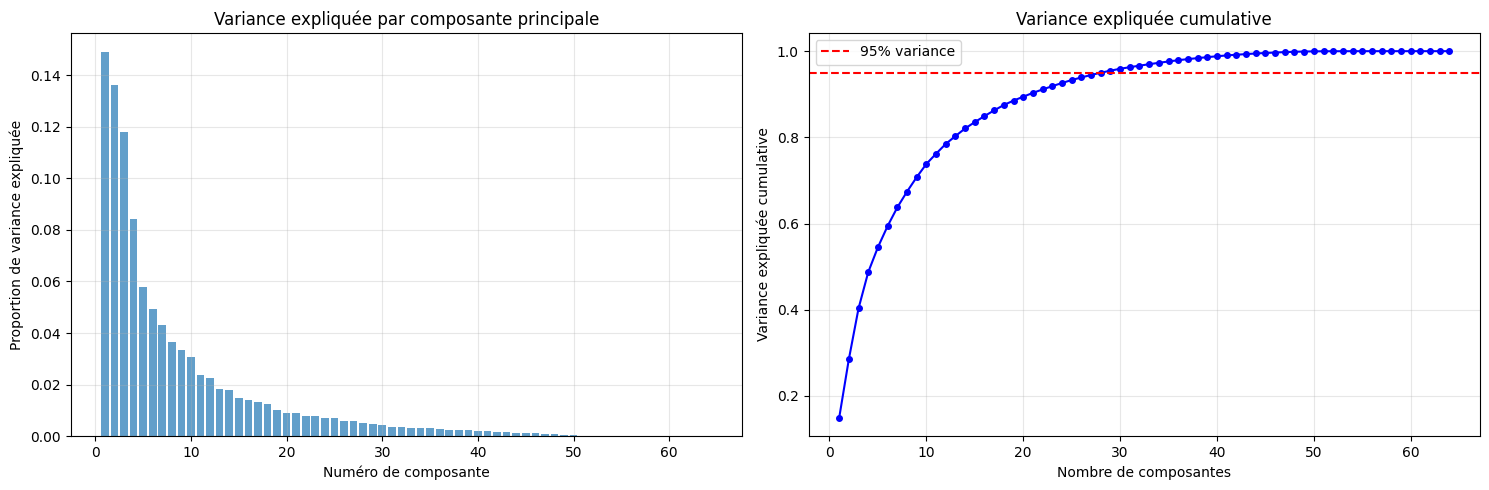

Nombre de composantes nécessaires pour 95% de variance: 29
Variance expliquée par les 2 premières composantes: 28.51%


In [20]:
# PCA avec toutes les composantes pour analyser la variance expliquée
pca_full = PCA(n_components=X.shape[1])
pca_full.fit(X)

# Variance expliquée cumulative
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Variance expliquée par composante
ax1.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
        pca_full.explained_variance_ratio_, alpha=0.7)
ax1.set_xlabel('Numéro de composante')
ax1.set_ylabel('Proportion de variance expliquée')
ax1.set_title('Variance expliquée par composante principale')
ax1.grid(True, alpha=0.3)

# Variance expliquée cumulative
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-o', markersize=4)
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
ax2.set_xlabel('Nombre de composantes')
ax2.set_ylabel('Variance expliquée cumulative')
ax2.set_title('Variance expliquée cumulative')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Nombre de composantes pour capturer 95% de la variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Nombre de composantes nécessaires pour 95% de variance: {n_components_95}")
print(f"Variance expliquée par les 2 premières composantes: {cumulative_variance[1]:.2%}")

### Visualisation avec t-SNE

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


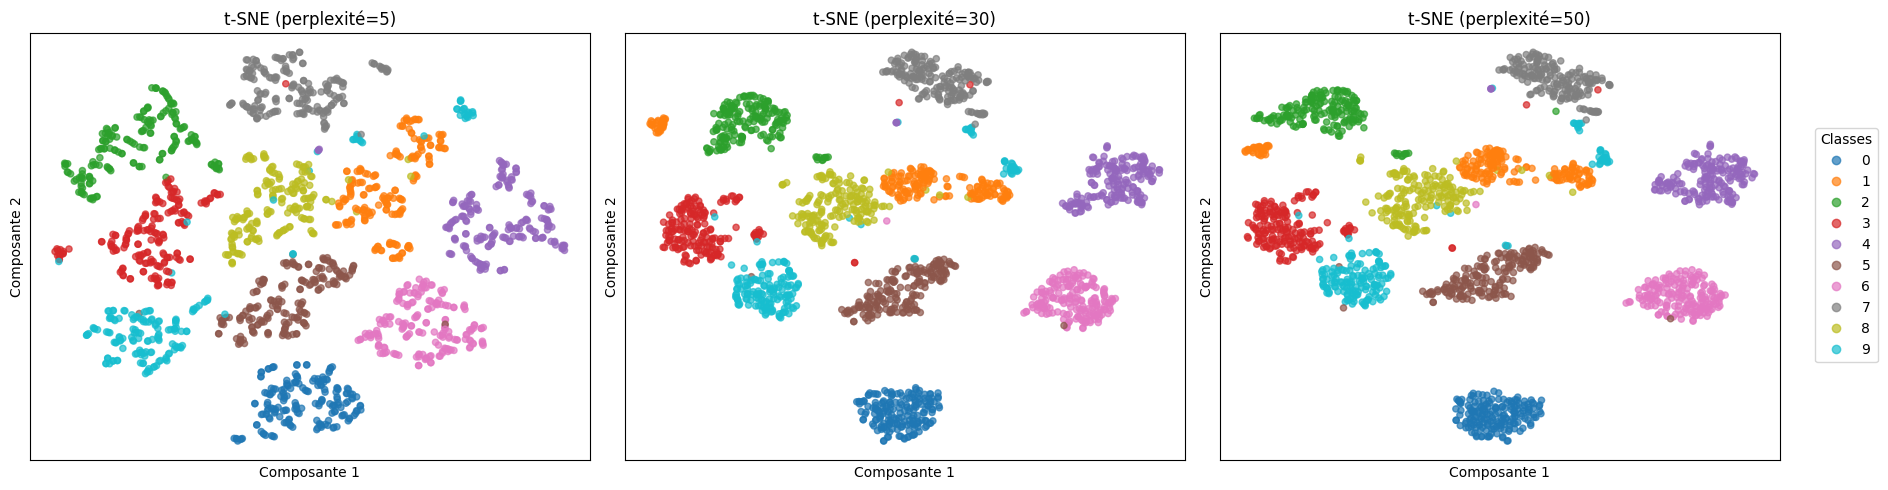

In [21]:
from sklearn.manifold import TSNE

# Test de différentes valeurs de perplexité
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, perplexity in zip(axes, perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, 
                early_exaggeration=12, n_iter=1000)
    X_tsne = tsne.fit_transform(X)
    
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                        c=Y, s=20, cmap='tab10', alpha=0.7)
    ax.set_title(f't-SNE (perplexité={perplexity})')
    ax.set_xlabel('Composante 1')
    ax.set_ylabel('Composante 2')
    ax.set_xticks([])
    ax.set_yticks([])

# Légende commune
handles, labels = scatter.legend_elements()
fig.legend(handles, digits.target_names.tolist(), 
          loc='center right', title='Classes', bbox_to_anchor=(1.05, 0.5))

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


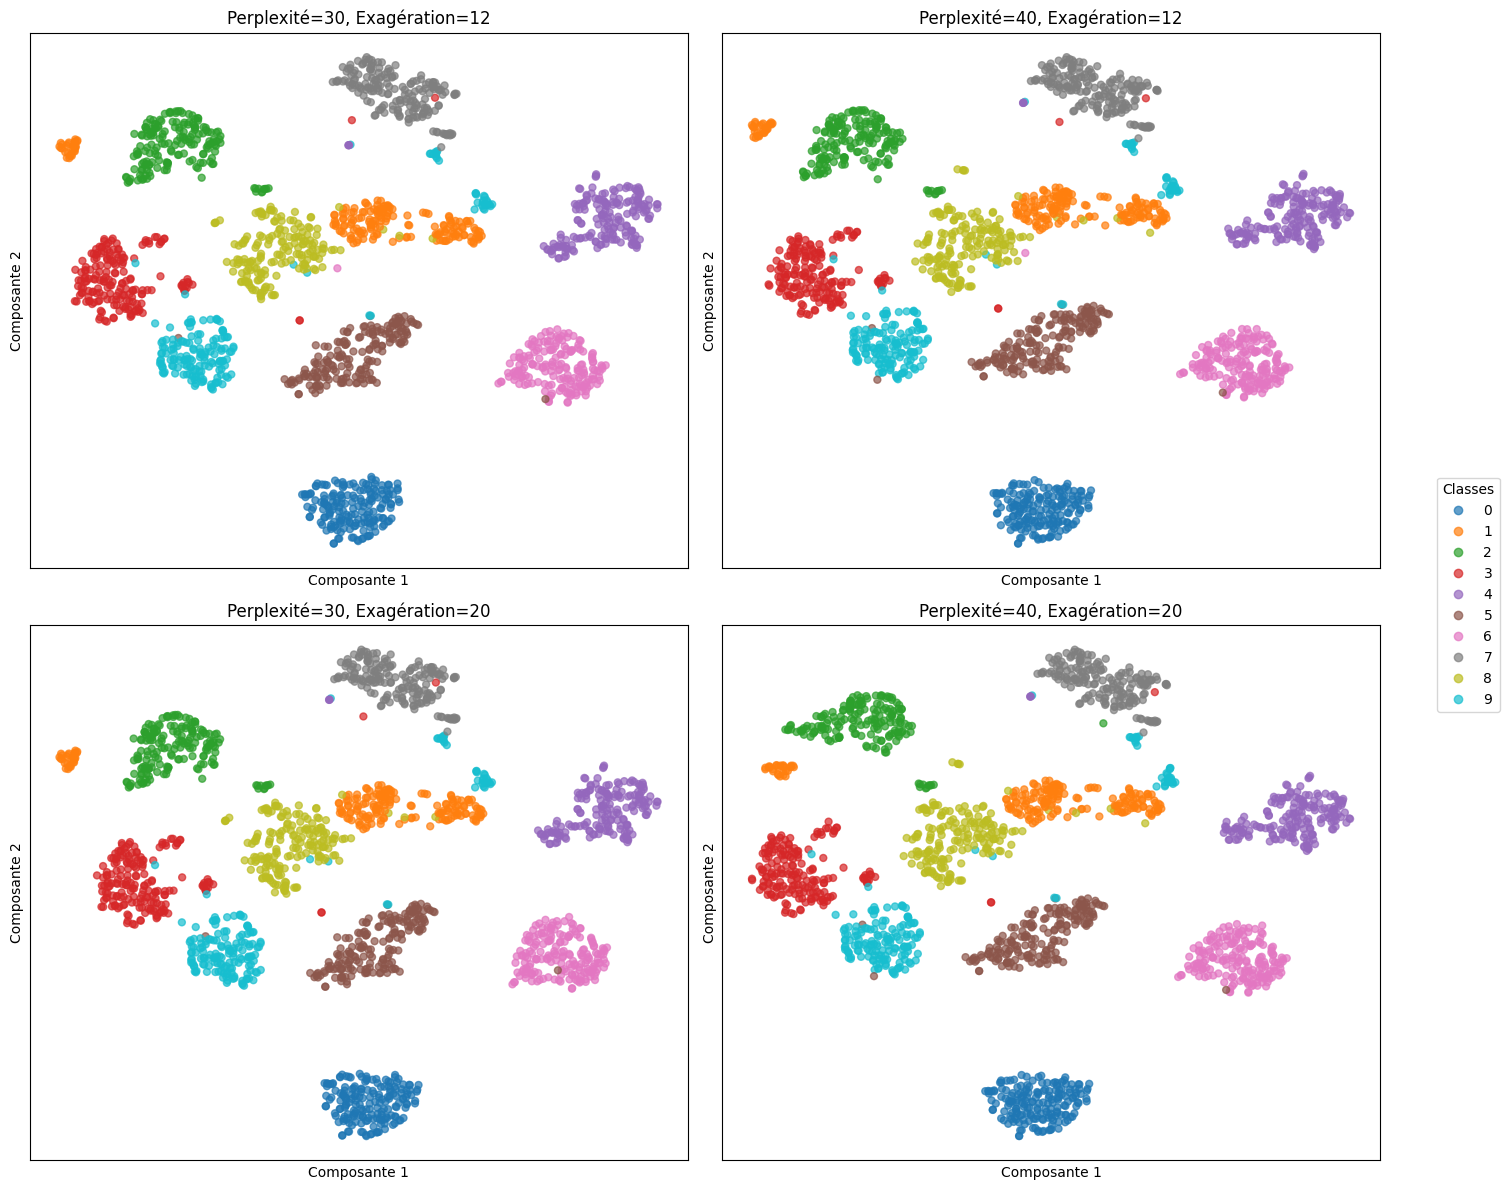

Configuration optimale recommandée: perplexité=30-40, early_exaggeration=12-20


In [22]:
# Configuration optimale de t-SNE avec variation de l'exagération initiale
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

configs = [
    {'perplexity': 30, 'early_exaggeration': 12},
    {'perplexity': 40, 'early_exaggeration': 12},
    {'perplexity': 30, 'early_exaggeration': 20},
    {'perplexity': 40, 'early_exaggeration': 20},
]

for ax, config in zip(axes, configs):
    tsne = TSNE(n_components=2, 
                perplexity=config['perplexity'],
                early_exaggeration=config['early_exaggeration'],
                random_state=42, 
                n_iter=1000)
    X_tsne = tsne.fit_transform(X)
    
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                        c=Y, s=25, cmap='tab10', alpha=0.7)
    ax.set_title(f"Perplexité={config['perplexity']}, Exagération={config['early_exaggeration']}")
    ax.set_xlabel('Composante 1')
    ax.set_ylabel('Composante 2')
    ax.set_xticks([])
    ax.set_yticks([])

handles, labels = scatter.legend_elements()
fig.legend(handles, digits.target_names.tolist(), 
          loc='center right', title='Classes', bbox_to_anchor=(1.08, 0.5))

plt.tight_layout()
plt.show()

print("Configuration optimale recommandée: perplexité=30-40, early_exaggeration=12-20")

### Bonus: Visualisation avec UMAP (Uniform Manifold Approximation and Projection)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


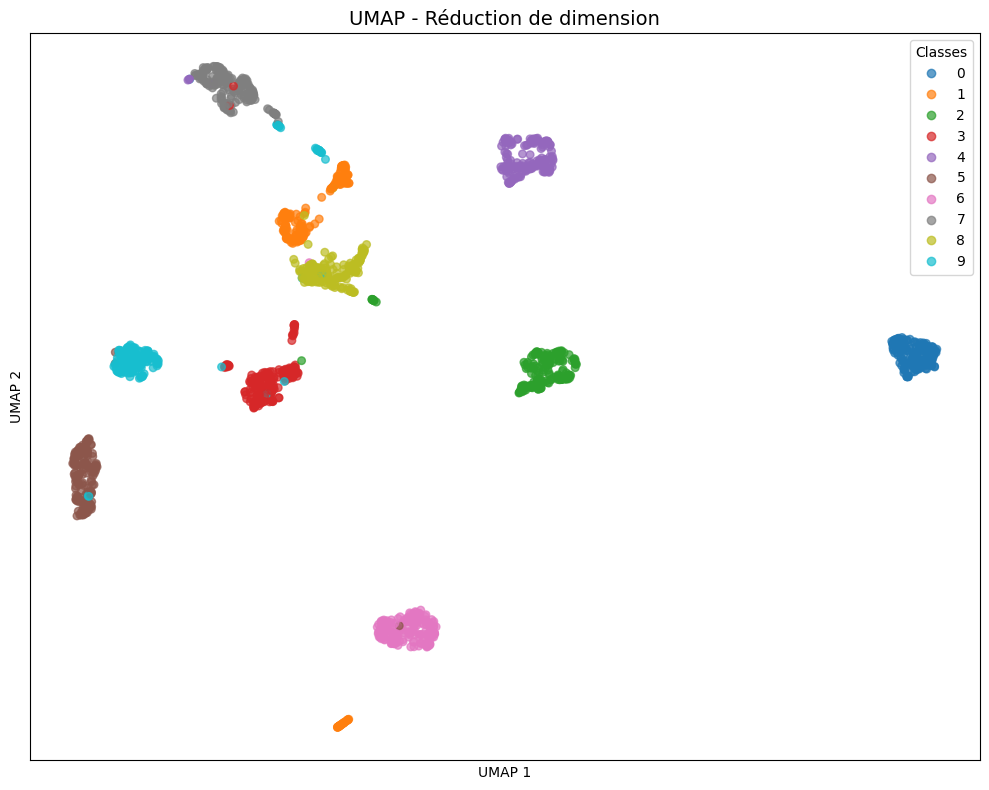

UMAP appliqué avec succès!


In [23]:
# Installation: pip install umap-learn
try:
    import umap
    
    # Application de UMAP
    reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
    X_umap = reducer.fit_transform(X)
    
    # Visualisation
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], 
                        c=Y, s=30, cmap='tab10', alpha=0.7)
    ax.set_title('UMAP - Réduction de dimension', fontsize=14)
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_xticks([])
    ax.set_yticks([])
    
    legend = ax.legend(scatter.legend_elements()[0],
                      digits.target_names.tolist(),
                      loc="upper right",
                      title="Classes")
    
    plt.tight_layout()
    plt.show()
    
    print("UMAP appliqué avec succès!")
    
except ImportError:
    print("UMAP non installé. Installez avec: pip install umap-learn")

### Bonus: Auto-encodeur pour la réduction de dimension

In [25]:
# Installation des bibliothèques nécessaires pour l'auto-encodeur
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, Model
    print("TensorFlow version:", tf.__version__)
    print("Bibliothèques chargées avec succès!")
except ImportError:
    print("TensorFlow non installé. Installez avec: pip install tensorflow")

TensorFlow version: 2.19.0
Bibliothèques chargées avec succès!


#### Construction de l'auto-encodeur

In [26]:
# Normalisation des données pour l'auto-encodeur
X_normalized = X / 16.0  # Les valeurs des pixels sont entre 0 et 16

# Architecture de l'auto-encodeur
input_dim = X.shape[1]  # 64 features (8x8 pixels)
encoding_dim = 2  # Dimension de l'espace latent (pour visualisation 2D)

# Encodeur
encoder_input = keras.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(encoder_input)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='linear', name='latent_space')(encoded)

encoder = Model(encoder_input, encoded, name='encoder')

# Décodeur
decoder_input = keras.Input(shape=(encoding_dim,))
decoded = layers.Dense(16, activation='relu')(decoder_input)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

decoder = Model(decoder_input, decoded, name='decoder')

# Auto-encodeur complet
autoencoder_input = keras.Input(shape=(input_dim,))
encoded_output = encoder(autoencoder_input)
decoded_output = decoder(encoded_output)
autoencoder = Model(autoencoder_input, decoded_output, name='autoencoder')

# Compilation
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Résumé du modèle
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 2)              │         2,642 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64)             │         2,704 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,346 (20.88 KB)

 Trainable params: 5,346 (20.88 KB)

 Non-trainable params: 0 (0.00 B)

#### Entraînement de l'auto-encodeur

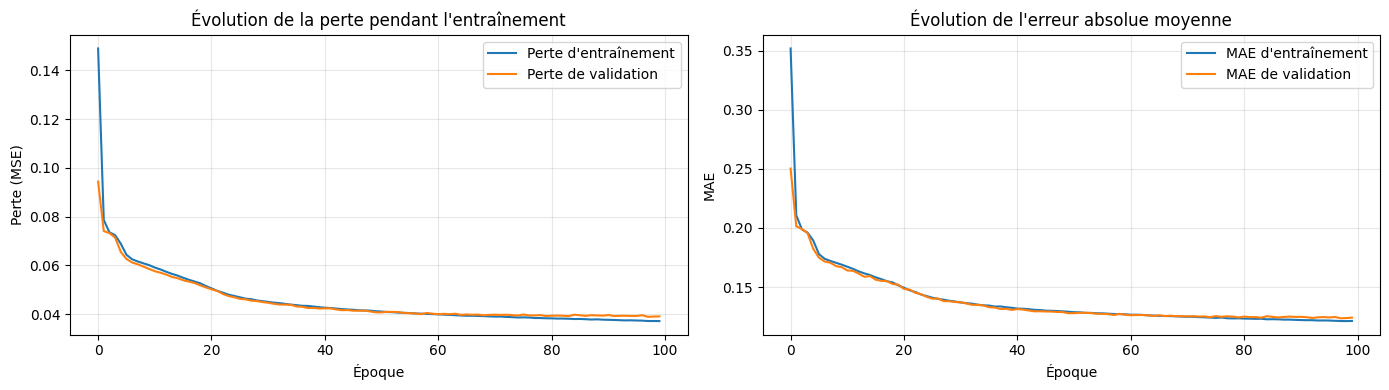

Perte finale: 0.0371
Perte de validation finale: 0.0391


In [27]:
# Entraînement de l'auto-encodeur
history = autoencoder.fit(
    X_normalized, X_normalized,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=0
)

# Visualisation de la perte d'entraînement
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.plot(history.history['loss'], label='Perte d\'entraînement')
ax1.plot(history.history['val_loss'], label='Perte de validation')
ax1.set_xlabel('Époque')
ax1.set_ylabel('Perte (MSE)')
ax1.set_title('Évolution de la perte pendant l\'entraînement')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['mae'], label='MAE d\'entraînement')
ax2.plot(history.history['val_mae'], label='MAE de validation')
ax2.set_xlabel('Époque')
ax2.set_ylabel('MAE')
ax2.set_title('Évolution de l\'erreur absolue moyenne')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Perte finale: {history.history['loss'][-1]:.4f}")
print(f"Perte de validation finale: {history.history['val_loss'][-1]:.4f}")

#### Visualisation de l'espace latent

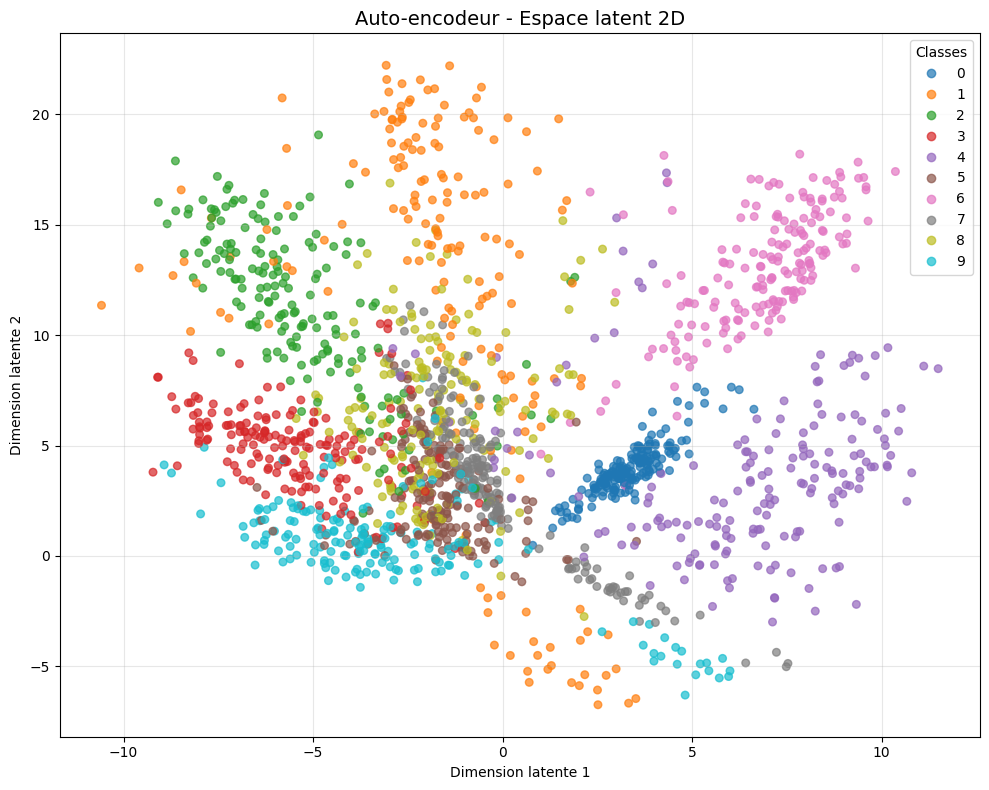

Visualisation de l'espace latent de l'auto-encodeur terminée!


In [28]:
# Encodage des données dans l'espace latent 2D
X_encoded = encoder.predict(X_normalized, verbose=0)

# Visualisation de l'espace latent
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_encoded[:, 0], X_encoded[:, 1], 
                    c=Y, s=30, cmap='tab10', alpha=0.7)
ax.set_title('Auto-encodeur - Espace latent 2D', fontsize=14)
ax.set_xlabel('Dimension latente 1')
ax.set_ylabel('Dimension latente 2')
ax.grid(True, alpha=0.3)

legend = ax.legend(scatter.legend_elements()[0],
                  digits.target_names.tolist(),
                  loc="upper right",
                  title="Classes")

plt.tight_layout()
plt.show()

print("Visualisation de l'espace latent de l'auto-encodeur terminée!")

#### Reconstruction des images

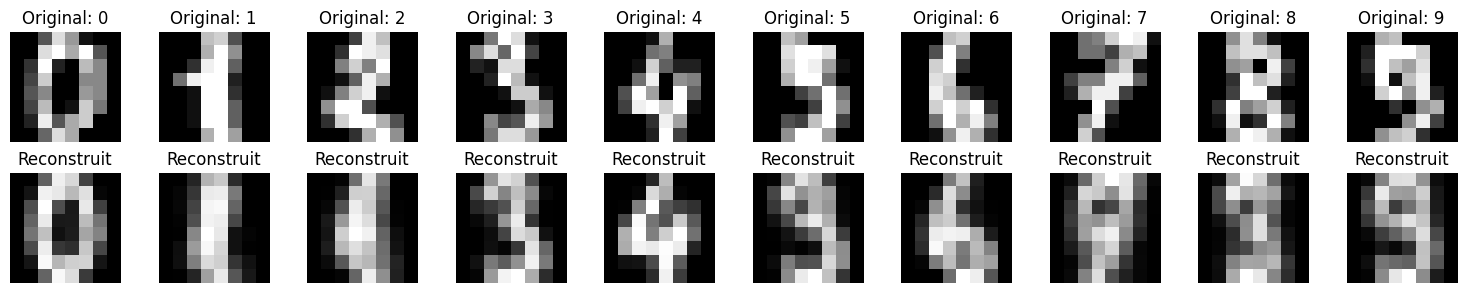

Erreur de reconstruction moyenne (MSE): 0.037339


In [29]:
# Reconstruction de quelques exemples
n_examples = 10
X_reconstructed = autoencoder.predict(X_normalized[:n_examples], verbose=0)

# Visualisation des images originales vs reconstruites
fig, axes = plt.subplots(2, n_examples, figsize=(15, 3))

for i in range(n_examples):
    # Images originales
    axes[0, i].imshow(digits.images[i], cmap='gray')
    axes[0, i].set_title(f'Original: {Y[i]}')
    axes[0, i].axis('off')
    
    # Images reconstruites
    axes[1, i].imshow(X_reconstructed[i].reshape(8, 8), cmap='gray')
    axes[1, i].set_title('Reconstruit')
    axes[1, i].axis('off')

axes[0, 0].set_ylabel('Original', fontsize=12, rotation=0, ha='right', va='center')
axes[1, 0].set_ylabel('Reconstruit', fontsize=12, rotation=0, ha='right', va='center')

plt.tight_layout()
plt.show()

# Calcul de l'erreur de reconstruction
mse = np.mean((X_normalized - autoencoder.predict(X_normalized, verbose=0))**2)
print(f"Erreur de reconstruction moyenne (MSE): {mse:.6f}")

#### Auto-encodeur avec espace latent 3D

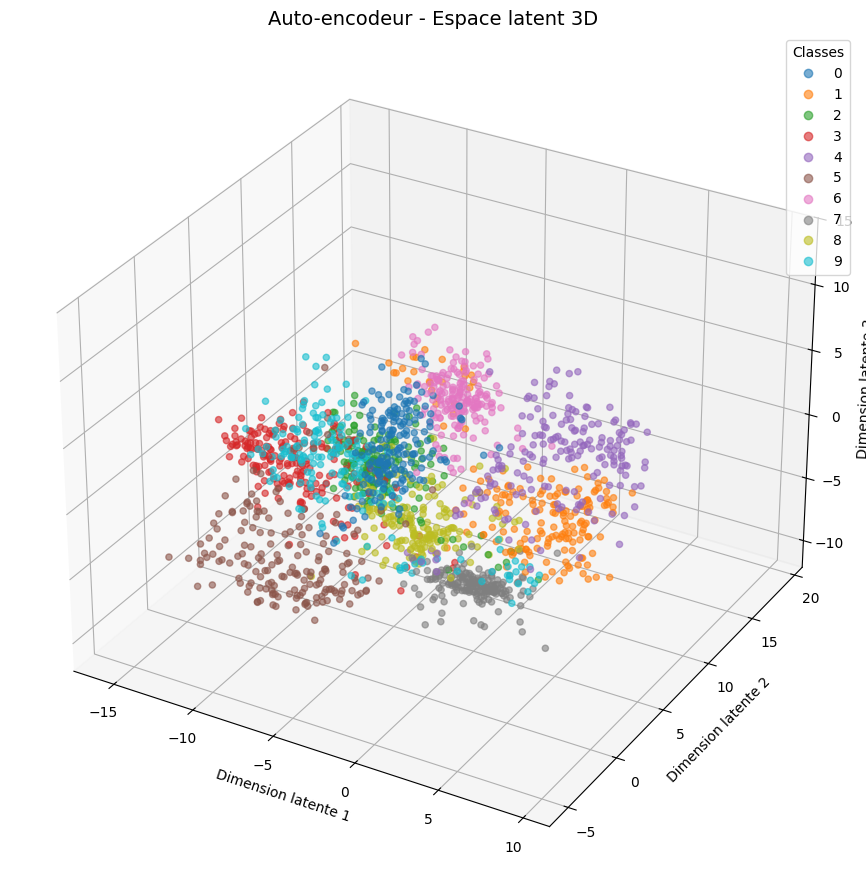

Perte finale (3D): 0.0258


In [30]:
# Auto-encodeur avec 3 dimensions latentes pour comparaison
encoding_dim_3d = 3

# Encodeur 3D
encoder_input_3d = keras.Input(shape=(input_dim,))
encoded_3d = layers.Dense(32, activation='relu')(encoder_input_3d)
encoded_3d = layers.Dense(16, activation='relu')(encoded_3d)
encoded_3d = layers.Dense(encoding_dim_3d, activation='linear')(encoded_3d)
encoder_3d = Model(encoder_input_3d, encoded_3d)

# Décodeur 3D
decoder_input_3d = keras.Input(shape=(encoding_dim_3d,))
decoded_3d = layers.Dense(16, activation='relu')(decoder_input_3d)
decoded_3d = layers.Dense(32, activation='relu')(decoded_3d)
decoded_3d = layers.Dense(input_dim, activation='sigmoid')(decoded_3d)
decoder_3d = Model(decoder_input_3d, decoded_3d)

# Auto-encodeur complet 3D
autoencoder_3d = Model(encoder_input_3d, decoder_3d(encoder_3d(encoder_input_3d)))
autoencoder_3d.compile(optimizer='adam', loss='mse')

# Entraînement
history_3d = autoencoder_3d.fit(
    X_normalized, X_normalized,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Encodage et visualisation 3D
X_encoded_3d = encoder_3d.predict(X_normalized, verbose=0)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter_3d = ax.scatter(X_encoded_3d[:, 0], X_encoded_3d[:, 1], X_encoded_3d[:, 2],
                       c=Y, s=20, cmap='tab10', alpha=0.6)

ax.set_title('Auto-encodeur - Espace latent 3D', fontsize=14)
ax.set_xlabel('Dimension latente 1')
ax.set_ylabel('Dimension latente 2')
ax.set_zlabel('Dimension latente 3')

legend = ax.legend(scatter_3d.legend_elements()[0],
                  digits.target_names.tolist(),
                  loc="upper right",
                  title="Classes")

plt.tight_layout()
plt.show()

print(f"Perte finale (3D): {history_3d.history['loss'][-1]:.4f}")

### Comparaison des méthodes de réduction de dimension

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


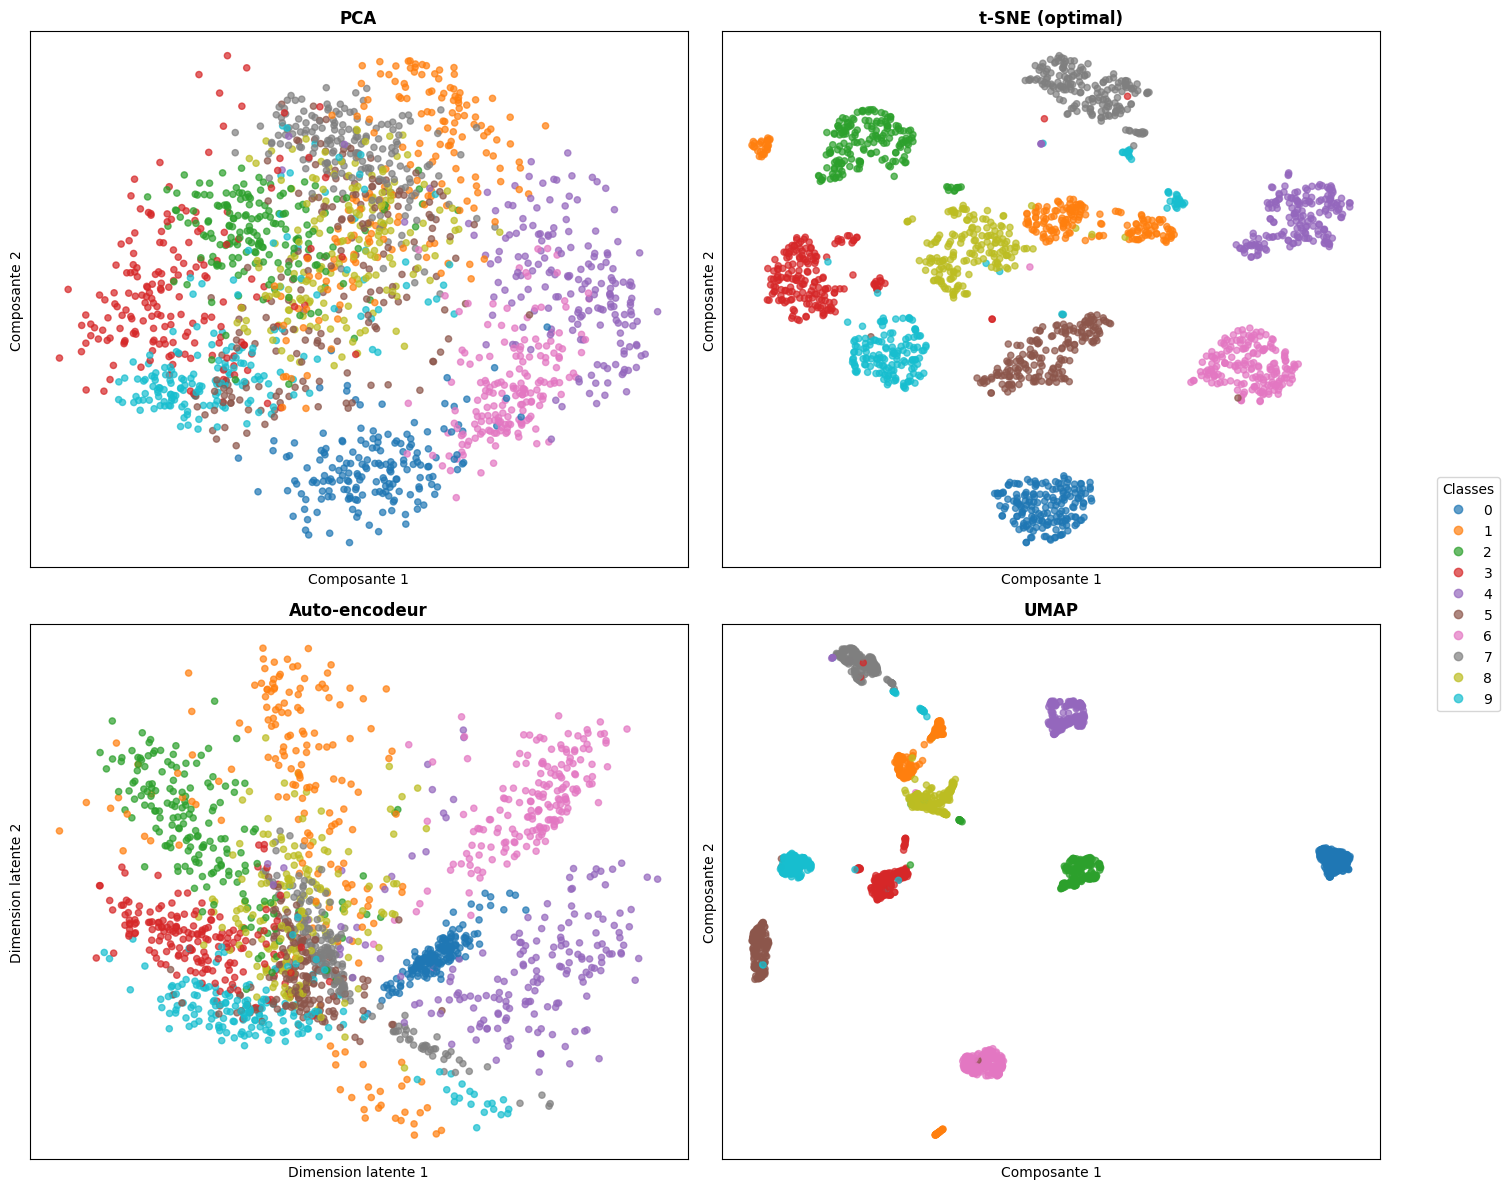


Comparaison des méthodes:
- PCA: Linéaire, rapide, préserve la variance globale
- t-SNE: Non-linéaire, préserve les structures locales, meilleure séparation
- Auto-encodeur: Non-linéaire, apprentissage profond, reconstruction possible
- UMAP: Non-linéaire, équilibre structure locale et globale, plus rapide que t-SNE


In [31]:
# Comparaison visuelle des quatre méthodes
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# PCA
X_pca = PCA(n_components=2, random_state=42).fit_transform(X)
scatter1 = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=Y, s=20, cmap='tab10', alpha=0.7)
axes[0, 0].set_title('PCA', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Composante 1')
axes[0, 0].set_ylabel('Composante 2')
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])

# t-SNE (configuration optimale)
X_tsne_opt = TSNE(n_components=2, perplexity=30, early_exaggeration=12, 
                  random_state=42, n_iter=1000).fit_transform(X)
scatter2 = axes[0, 1].scatter(X_tsne_opt[:, 0], X_tsne_opt[:, 1], c=Y, s=20, cmap='tab10', alpha=0.7)
axes[0, 1].set_title('t-SNE (optimal)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Composante 1')
axes[0, 1].set_ylabel('Composante 2')
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

# Auto-encodeur
scatter3 = axes[1, 0].scatter(X_encoded[:, 0], X_encoded[:, 1], c=Y, s=20, cmap='tab10', alpha=0.7)
axes[1, 0].set_title('Auto-encodeur', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Dimension latente 1')
axes[1, 0].set_ylabel('Dimension latente 2')
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

# UMAP ou message
try:
    import umap
    X_umap_comp = umap.UMAP(n_components=2, random_state=42).fit_transform(X)
    scatter4 = axes[1, 1].scatter(X_umap_comp[:, 0], X_umap_comp[:, 1], c=Y, s=20, cmap='tab10', alpha=0.7)
    axes[1, 1].set_title('UMAP', fontsize=12, fontweight='bold')
except ImportError:
    axes[1, 1].text(0.5, 0.5, 'UMAP non disponible\nInstallez umap-learn', 
                    ha='center', va='center', transform=axes[1, 1].transAxes, fontsize=12)
    
axes[1, 1].set_xlabel('Composante 1')
axes[1, 1].set_ylabel('Composante 2')
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

# Légende commune
handles, labels = scatter1.legend_elements()
fig.legend(handles, digits.target_names.tolist(), 
          loc='center right', title='Classes', bbox_to_anchor=(1.08, 0.5))

plt.tight_layout()
plt.show()

print("\nComparaison des méthodes:")
print("- PCA: Linéaire, rapide, préserve la variance globale")
print("- t-SNE: Non-linéaire, préserve les structures locales, meilleure séparation")
print("- Auto-encodeur: Non-linéaire, apprentissage profond, reconstruction possible")
print("- UMAP: Non-linéaire, équilibre structure locale et globale, plus rapide que t-SNE")